In [2]:
import matplotlib.pyplot as plt
import numpy as np
from decimal import Decimal

In [3]:
# BTC fund amount
A_FUND_AMOUNT = Decimal('1.0')
# USDT fund amount
B_FUND_AMOUNT = Decimal('0.0')

# fee in real:
FREE_REAL = Decimal('.01')

A_LIMIT = Decimal('.000001')
B_LIMIT = Decimal('.01')

A_FUND_AMOUNT_LIST = []
B_FUND_AMOUNT_LIST = []
PRICE_LIST = []

In [4]:
def buy():
    global PRICE, A_FUND_AMOUNT, B_FUND_AMOUNT, FREE_REAL
    # buy A sell B:
#     print("buy with price {}".format(PRICE))
    sell_amount_B = B_FUND_AMOUNT - (B_FUND_AMOUNT % B_LIMIT)
    
    cost = (sell_amount_B * FREE_REAL) / PRICE

    B_FUND_AMOUNT -= sell_amount_B
    A_FUND_AMOUNT += (sell_amount_B / PRICE - cost)

In [5]:
def sell():
    global PRICE, A_FUND_AMOUNT, B_FUND_AMOUNT, FREE_REAL
    # buy B sell A:
#     print("sell with price {}".format(PRICE))
    sell_amount_A = A_FUND_AMOUNT - (A_FUND_AMOUNT % A_LIMIT)

    cost = sell_amount_A * FREE_REAL * PRICE

    A_FUND_AMOUNT -= sell_amount_A
    B_FUND_AMOUNT += (sell_amount_A * PRICE - cost)

# Visualized data

In [6]:
test_file = '/home/nam/data/ccxt/preprocessing_data/BTC_USDT_binance_5m.csv'

In [7]:
import pandas as pd
df = pd.read_csv(test_file)
df_close = df.Close

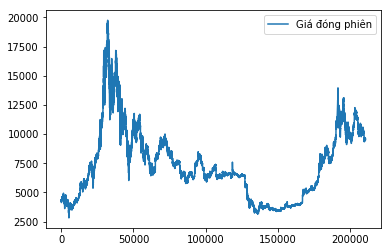

In [8]:
plt.plot(df_close, label='Giá đóng phiên')
plt.legend()
plt.show()

In [9]:
def strategy_01_current_price(threshold = 0.01):
    fee_assume = Decimal(threshold)
    global PRICE, A_FUND_AMOUNT, B_FUND_AMOUNT, Close_lst, Ts_lst
    global A_FUND_AMOUNT_LIST, B_FUND_AMOUNT_LIST, PRICE_LIST, SELL_TS, SELL_PRICE, BUY_TS, BUY_PRICE
    A_FUND_AMOUNT = Decimal('1.0')
    B_FUND_AMOUNT = Decimal('0.0')
    A_FUND_AMOUNT_LIST = []
    B_FUND_AMOUNT_LIST = []
    
    PRICE_LIST = []
    SELL_TS = []; BUY_TS = []; SELL_PRICE = []; BUY_PRICE = []
    PRICE = Decimal(str(Close_lst[0]))
    PREV_SIDE = 'buy'
    for NEW_PRICE, ts in zip(Close_lst[1:], Ts_lst[1:]):
        NEW_PRICE = Decimal(str(NEW_PRICE))
        if NEW_PRICE > PRICE / (Decimal('1.0') - fee_assume) and PREV_SIDE == 'buy':
            PRICE = NEW_PRICE
            sell()

            PREV_SIDE = 'sell'
            PRICE_LIST.append(PRICE)
            SELL_TS.append(ts)
            SELL_PRICE.append(PRICE)
            A_FUND_AMOUNT_LIST.append(A_FUND_AMOUNT)
            B_FUND_AMOUNT_LIST.append(B_FUND_AMOUNT)
            

        elif NEW_PRICE < PRICE * (Decimal('1.0') - fee_assume) and PREV_SIDE == 'sell':
            PRICE = NEW_PRICE
            buy()

            PREV_SIDE = 'buy'
            PRICE_LIST.append(PRICE)
            BUY_TS.append(ts)
            BUY_PRICE.append(PRICE)
            A_FUND_AMOUNT_LIST.append(A_FUND_AMOUNT)
            B_FUND_AMOUNT_LIST.append(B_FUND_AMOUNT)


    print("Number of trade: ", len(A_FUND_AMOUNT_LIST))

    print(A_FUND_AMOUNT, "  BTC")
    print(B_FUND_AMOUNT, "  USDT")

    print("Init amount USDT is ", Decimal('1.0') *
          Decimal(Close_lst[0]), "  USDT")
    
    balance = A_FUND_AMOUNT * Decimal(Close_lst[-1]) + B_FUND_AMOUNT
    print("Last amount USDT is ", balance , "  USDT")
    return balance

# Simulate: If know exactly next price in future

In [10]:
def strategy_01_future_price(threshold = 0.01):
    fee_assume = Decimal(threshold)
    global PRICE, A_FUND_AMOUNT, B_FUND_AMOUNT, Close_lst, Ts_lst
    global A_FUND_AMOUNT_LIST, B_FUND_AMOUNT_LIST, PRICE_LIST, SELL_TS, SELL_PRICE, BUY_TS, BUY_PRICE
    A_FUND_AMOUNT = Decimal('1.0')
    B_FUND_AMOUNT = Decimal('0.0')
    A_FUND_AMOUNT_LIST = []
    B_FUND_AMOUNT_LIST = []
    
    PRICE_LIST = []
    SELL_TS = []; BUY_TS = []; SELL_PRICE = []; BUY_PRICE = []
    PRICE = Decimal(str(Close_lst[0]))
    PREV_SIDE = 'buy'
    for NEW_PRICE, ts, FUTURE_PRICE in zip(Close_lst[1:-1], Ts_lst[1:-1], Close_lst[2:]):
        NEW_PRICE = Decimal(str(NEW_PRICE))
        FUTURE_PRICE = Decimal(str(FUTURE_PRICE))
        if NEW_PRICE > PRICE / (Decimal('1.0') - fee_assume) and FUTURE_PRICE < NEW_PRICE and PREV_SIDE == 'buy':
            PRICE = NEW_PRICE
            sell()

            PREV_SIDE = 'sell'
            PRICE_LIST.append(PRICE)
            SELL_TS.append(ts)
            SELL_PRICE.append(PRICE)
            A_FUND_AMOUNT_LIST.append(A_FUND_AMOUNT)
            B_FUND_AMOUNT_LIST.append(B_FUND_AMOUNT)
            

        elif NEW_PRICE < PRICE * (Decimal('1.0') - fee_assume) and FUTURE_PRICE > NEW_PRICE and PREV_SIDE == 'sell':
            PRICE = NEW_PRICE
            buy()

            PREV_SIDE = 'buy'
            PRICE_LIST.append(PRICE)
            BUY_TS.append(ts)
            BUY_PRICE.append(PRICE)
            A_FUND_AMOUNT_LIST.append(A_FUND_AMOUNT)
            B_FUND_AMOUNT_LIST.append(B_FUND_AMOUNT)


    print("Number of trade: ", len(A_FUND_AMOUNT_LIST))

    print(A_FUND_AMOUNT, "  BTC")
    print(B_FUND_AMOUNT, "  USDT")

    
    print("Init amount USDT is ", Decimal('1.0') *
          Decimal(Close_lst[0]), "  USDT")
    
    balance = A_FUND_AMOUNT * Decimal(Close_lst[-1]) + B_FUND_AMOUNT
    print("Last amount USDT is ", balance , "  USDT")
    return balance

In [11]:
from copy import deepcopy

def draw_simulation(img_out = None, from_idx = -1, to_idx = -1):
    global SELL_PRICE,SELL_TS, BUY_PRICE, BUY_TS, df
    plt.rcParams["figure.figsize"] = (20,10)
    
    df_tmp = deepcopy(df)
    
    if from_idx != -1 and to_idx !=-1:
        df_tmp = df[from_idx:to_idx]
        
    df_tmp['ts'] = pd.to_datetime(df['Timestamp'], unit='ms')
    df_tmp[['ts', 'Close']].set_index('ts').plot()

    plt.scatter(SELL_TS, SELL_PRICE, s= 300, facecolor='green')
    
    plt.scatter(BUY_TS, BUY_PRICE, s= 300, facecolor='red')
    plt.legend()
    plt.xlabel('Thời gian', fontsize=18)
    plt.ylabel('Giá đóng phiên', fontsize=16)
    
    if img_out:
        plt.savefig('figures/' + img_out)
        
    plt.show()

# Better Profit

In [12]:
Close_lst = df.Close.values
Ts_lst = df.Timestamp.values
strategy_01_current_price(threshold = 0.01)
strategy_01_future_price(threshold = 0.01)

Number of trade:  75
1.969969905776169505789E-7   BTC
3294.022480414900000000000000   USDT
Init amount USDT is  4332.600000000000363797880709   USDT
Last amount USDT is  3294.024369537240843115580939   USDT
Number of trade:  157
2.172798697418196954259E-7   BTC
3326.943513437100000000000000   USDT
Init amount USDT is  4332.600000000000363797880709   USDT
Last amount USDT is  3326.945597064138876154230302   USDT


Decimal('3326.945597064138876154230302')

In [15]:
Close_lst = df.Close.values
Ts_lst = df.Timestamp.values
strategy_01_current_price(threshold = 0.015)
strategy_01_future_price(threshold = 0.015)

Number of trade:  47
2.443856822109909903707E-7   BTC
4209.649389842900000000000000   USDT
Init amount USDT is  4332.600000000000363797880709   USDT
Last amount USDT is  4209.651733403838130519290166   USDT
Number of trade:  45
3.46831219610761998670E-7   BTC
4984.833682931500000000000000   USDT
Init amount USDT is  4332.600000000000363797880709   USDT
Last amount USDT is  4984.837008904163579363388622   USDT


Decimal('4984.837008904163579363388622')

# Risk case Worse performance

In [16]:
Close_lst = df.Close.values
Ts_lst = df.Timestamp.values
strategy_01_current_price(threshold = 0.001)
strategy_01_future_price(threshold = 0.001)

Number of trade:  407
9.6244595161449056338178E-7   BTC
160.5314079401000000000000000   USDT
Init amount USDT is  4332.600000000000363797880709   USDT
Last amount USDT is  160.5406374117976023190567417   USDT
Number of trade:  1877
1.90762592663058761717774845E-7   BTC
0.03352020610000000000000000000   USDT
Init amount USDT is  4332.600000000000363797880709   USDT
Last amount USDT is  0.03534954305860166837076780058   USDT


Decimal('0.03534954305860166837076780058')